In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as ms

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.preprocessing import OneHotEncoder

In [104]:
df = pd.read_csv("AB_NYC_2019.csv")
df_org = df
df = df.rename(columns={'neighbourhood_group': 'nghb_group', 'neighbourhood': 'nghb'})
df = df.drop(columns=['id', 'name', 'host_name', 'host_id', 'last_review', 'availability_365'])
df['reviews_per_month'] = df['reviews_per_month'].replace(np.nan, 0)
df = df.dropna()
df = df.drop(df.index[df.price==0])

Replacing reviews_per_month NaN with 0, as these are NaNs, because with 0 reviews division gives infinity, hence it can easily be replaced with 0. Then, removing all NaN rows, as only left NaN are 21 in host_name column

Factorizing categorical values, so that there are no strings but rather each category has assigned value from 0...n, where n is number of unique categories.

In [105]:
nghb_group = df['nghb_group']
nghb = df['nghb']
room_type = df['room_type']

df['nghb_group'] = nghb_group.factorize()[0]
df['nghb'] = nghb.factorize()[0]
df['room_type'] = room_type.factorize()[0]

# pd.DataFrame(nghb_1hot.toarray(), columns=nghb_encoder.categories_)

In [106]:
df['room_type'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
df_org.head(20)

In [107]:
X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, random_state=77)
# no stratify as it is regression problem not classification 

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))


In [71]:
X_train[:1]

,host_name,nghb_group,nghb,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count
36994,1059,0,3,40.68303,-73.95988,0,1,1,0.14,1


In [108]:
model = keras.models.Sequential([
    normalizer,
    keras.layers.Dense(500, activation="relu"),
    keras.layers.Dense(250, activation="relu"),
    keras.layers.Dense(125, activation="relu"),
    keras.layers.Dense(1),
])

model.compile(loss='mean_absolute_error',
             optimizer=tf.keras.optimizers.Adam(0.001))

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 9)                 19        
_________________________________________________________________
dense_31 (Dense)             (None, 500)               5000      
_________________________________________________________________
dense_32 (Dense)             (None, 250)               125250    
_________________________________________________________________
dense_33 (Dense)             (None, 125)               31375     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 126       
Total params: 161,770
Trainable params: 161,751
Non-trainable params: 19
_________________________________________________________________


In [109]:
history = model.fit(X_train, y_train, epochs=500)

Epoch 1/500
1146/1146 [==============================] - 4s 3ms/step - loss: 78.8986
Epoch 2/500
1146/1146 [==============================] - 3s 3ms/step - loss: 62.9212
Epoch 3/500
1146/1146 [==============================] - 3s 3ms/step - loss: 63.5335
Epoch 4/500
1146/1146 [==============================] - 3s 3ms/step - loss: 61.0848
Epoch 5/500
1146/1146 [==============================] - 3s 3ms/step - loss: 60.0054
Epoch 6/500
1146/1146 [==============================] - 3s 3ms/step - loss: 62.3269
Epoch 7/500
1146/1146 [==============================] - 3s 3ms/step - loss: 61.2025
Epoch 8/500
1146/1146 [==============================] - 3s 3ms/step - loss: 61.5705
Epoch 9/500
1146/1146 [==============================] - 3s 3ms/step - loss: 61.1208
Epoch 10/500
1146/1146 [==============================] - 3s 3ms/step - loss: 62.2493
Epoch 11/500
1146/1146 [==============================] - 3s 3ms/step - loss: 61.0691
Epoch 12/500
1146/1146 [==============================] - 3s 3m

1146/1146 [==============================] - 3s 3ms/step - loss: 54.6158
Epoch 97/500
1146/1146 [==============================] - 3s 3ms/step - loss: 56.2281
Epoch 98/500
1146/1146 [==============================] - 3s 3ms/step - loss: 57.0041
Epoch 99/500
1146/1146 [==============================] - 3s 3ms/step - loss: 55.7828
Epoch 100/500
1146/1146 [==============================] - 3s 3ms/step - loss: 55.9868
Epoch 101/500
1146/1146 [==============================] - 3s 3ms/step - loss: 54.9695
Epoch 102/500
1146/1146 [==============================] - 3s 3ms/step - loss: 55.3804
Epoch 103/500
1146/1146 [==============================] - 3s 3ms/step - loss: 55.6156
Epoch 104/500
1146/1146 [==============================] - 3s 3ms/step - loss: 55.5599
Epoch 105/500
1146/1146 [==============================] - 3s 3ms/step - loss: 52.9400
Epoch 106/500
1146/1146 [==============================] - 3s 3ms/step - loss: 53.3634
Epoch 107/500
1146/1146 [==============================] - 3

1146/1146 [==============================] - 3s 3ms/step - loss: 52.8416
Epoch 191/500
1146/1146 [==============================] - 3s 3ms/step - loss: 52.0360
Epoch 192/500
1146/1146 [==============================] - 3s 3ms/step - loss: 52.2905
Epoch 193/500
1146/1146 [==============================] - 3s 3ms/step - loss: 53.5961
Epoch 194/500
1146/1146 [==============================] - 3s 3ms/step - loss: 50.9745
Epoch 195/500
1146/1146 [==============================] - 3s 3ms/step - loss: 52.0388
Epoch 196/500
1146/1146 [==============================] - 3s 3ms/step - loss: 51.9299
Epoch 197/500
1146/1146 [==============================] - 3s 3ms/step - loss: 51.3471
Epoch 198/500
1146/1146 [==============================] - 3s 3ms/step - loss: 54.4923
Epoch 199/500
1146/1146 [==============================] - 3s 3ms/step - loss: 50.7944
Epoch 200/500
1146/1146 [==============================] - 3s 3ms/step - loss: 52.3029
Epoch 201/500
1146/1146 [==============================] 

1146/1146 [==============================] - 4s 3ms/step - loss: 49.0409
Epoch 285/500
1146/1146 [==============================] - 4s 3ms/step - loss: 49.5947
Epoch 286/500
1146/1146 [==============================] - 4s 4ms/step - loss: 47.4750
Epoch 287/500
1146/1146 [==============================] - 4s 3ms/step - loss: 48.7062
Epoch 288/500
1146/1146 [==============================] - 4s 3ms/step - loss: 47.8498
Epoch 289/500
1146/1146 [==============================] - 3s 3ms/step - loss: 49.1182
Epoch 290/500
1146/1146 [==============================] - 3s 3ms/step - loss: 47.7797
Epoch 291/500
1146/1146 [==============================] - 3s 3ms/step - loss: 49.4950
Epoch 292/500
1146/1146 [==============================] - 3s 3ms/step - loss: 48.3676
Epoch 293/500
1146/1146 [==============================] - 3s 3ms/step - loss: 47.2763
Epoch 294/500
1146/1146 [==============================] - 3s 3ms/step - loss: 49.6838
Epoch 295/500
1146/1146 [==============================] 

1146/1146 [==============================] - 3s 3ms/step - loss: 47.1201
Epoch 379/500
1146/1146 [==============================] - 3s 3ms/step - loss: 47.4083
Epoch 380/500
1146/1146 [==============================] - 4s 3ms/step - loss: 46.4960
Epoch 381/500
1146/1146 [==============================] - 3s 3ms/step - loss: 47.3945
Epoch 382/500
1146/1146 [==============================] - 3s 3ms/step - loss: 46.2096
Epoch 383/500
1146/1146 [==============================] - 3s 3ms/step - loss: 46.7112
Epoch 384/500
1146/1146 [==============================] - 3s 3ms/step - loss: 45.8185
Epoch 385/500
1146/1146 [==============================] - 3s 3ms/step - loss: 45.4319
Epoch 386/500
1146/1146 [==============================] - 3s 3ms/step - loss: 46.2369
Epoch 387/500
1146/1146 [==============================] - 4s 3ms/step - loss: 47.7877
Epoch 388/500
1146/1146 [==============================] - 4s 3ms/step - loss: 46.7060
Epoch 389/500
1146/1146 [==============================] 

1146/1146 [==============================] - 3s 3ms/step - loss: 47.8959
Epoch 473/500
1146/1146 [==============================] - 3s 3ms/step - loss: 43.1908
Epoch 474/500
1146/1146 [==============================] - 3s 3ms/step - loss: 43.5435
Epoch 475/500
1146/1146 [==============================] - 3s 3ms/step - loss: 43.0705
Epoch 476/500
1146/1146 [==============================] - 3s 3ms/step - loss: 44.8740
Epoch 477/500
1146/1146 [==============================] - 3s 3ms/step - loss: 46.1612
Epoch 478/500
1146/1146 [==============================] - 3s 3ms/step - loss: 43.0981
Epoch 479/500
1146/1146 [==============================] - 4s 3ms/step - loss: 44.1969
Epoch 480/500
1146/1146 [==============================] - 3s 3ms/step - loss: 44.9906
Epoch 481/500
1146/1146 [==============================] - 3s 3ms/step - loss: 42.7827
Epoch 482/500
1146/1146 [==============================] - 3s 3ms/step - loss: 44.5175
Epoch 483/500
1146/1146 [==============================] 

In [87]:
results = {}
results["model"] = model.evaluate(X_test, y_test)

382/382 [==============================] - 1s 2ms/step - loss: 58.8937


In [88]:
pd.DataFrame(results, index=['Mean absolute error of price']).T

,Mean absolute error of price
model,58.893738


<AxesSubplot:>

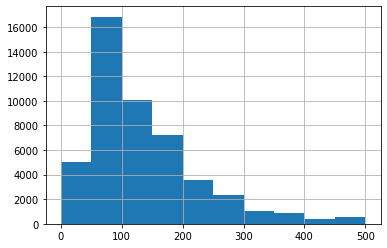

In [112]:
df["price"].hist(range=[0,500])

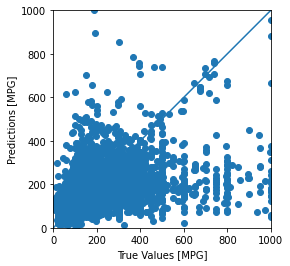

In [117]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0,1000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


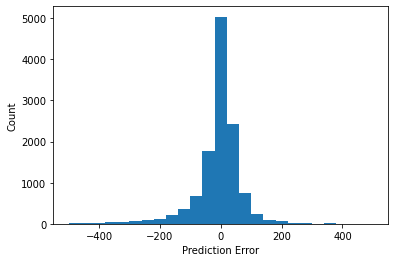

In [123]:
error = test_predictions - y_test
plt.hist(error, bins=25, range=[-500, 500])
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')

In [121]:
error.mean()

-19.997735510831497

In [128]:
keras.backend.clear_session()